In [ ]:
!pip install neuralforecast
!pip install torchinfo
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Memulai Proses Utama...
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/8666601c9266fe76703752f0bb1dff54d4d6f778/dataset/m4_hourly_dataset.tsf
Data berhasil diunduh.
Menemukan 414 series dalam data.
Memulai parsing data series...
Peringatan: Skipping baris 1 karena format tidak sesuai (kurang dari 4 bagian dipisah ':'). Data: T1:2015-07-01 12-00-00:605,586,586,559,511,443,422,395,382,370,383,397,420,455,493,554,610,666,715,7...
Peringatan: Skipping baris 2 karena format tidak sesuai (kurang dari 4 bagian dipisah ':'). Data: T2:2015-07-01 12-00-00:3124,2990,2862,2809,2544,2201,1996,1861,1735,1713,1724,1798,1891,2037,2102,21...
Peringatan: Skipping baris 3 karena format tidak sesuai (kurang dari 4 bagian dipisah ':'). Data: T3:2015-07-01 12-00-00:1828,1806,1897,1750,1679,1620,1463,1342,1192,1108,1058,1024,1031,1091,1208,13...
Peringatan: Skipping baris 4 karena format tidak sesuai (kurang dari 4 bagian dipisah ':'). Data: T4:2015-07-01 12-0

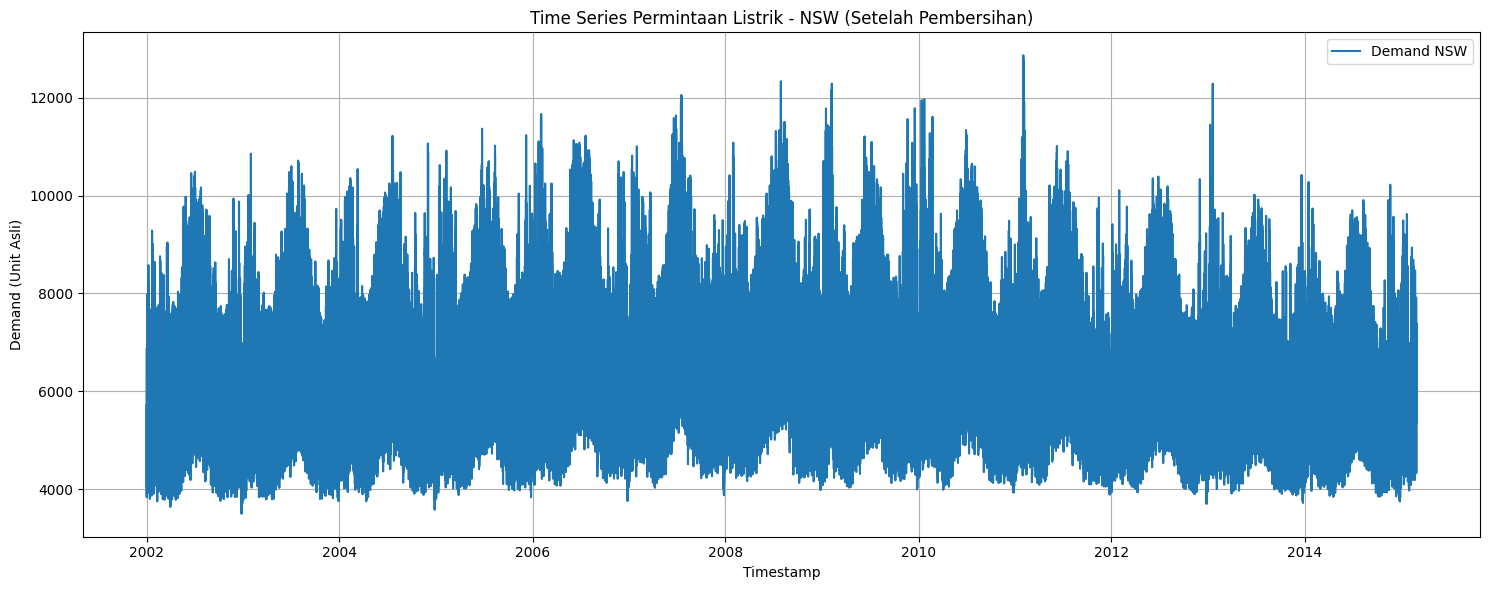

INFO:lightning_fabric.utilities.seed:Seed set to 1


Plot time series ditampilkan.
--------------------------------------------------
Normalisasi data (MinMaxScaler ke rentang [0, 1])...
Data dinormalisasi. Contoh 5 data pertama ternormalisasi: [0.23652852 0.19875331 0.1618857  0.11789493 0.08399275]
--------------------------------------------------
Membuat 3 fold CV:
  Panjang data total: 230736
  Horizon (Test set per fold): 24
  Step size antar fold: 24
  Panjang window training per fold: 230616
  Fold 1: Train indices [0:230616], Test indices [230616:230640]
  Fold 2: Train indices [24:230640], Test indices [230640:230664]
  Fold 3: Train indices [48:230664], Test indices [230664:230688]

Berhasil membuat 3 fold untuk Cross-Validation.
--------------------------------------------------
Memulai Cross-Validation...

===== Memproses Fold 1/3 =====
Fold 1: Data train disiapkan (230616 baris)
Fold 1: Data test disiapkan (24 baris)

Terjadi error dalam proses utama: max_epochs is deprecated, use max_steps instead.

Total Waktu Eksekusi Ke

Traceback (most recent call last):
  File "<ipython-input-3-42a90b8acfee>", line 398, in <cell line: 0>
    model = NHITS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/neuralforecast/models/nhits.py", line 293, in __init__
    super(NHITS, self).__init__(
  File "/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py", line 281, in __init__
    raise Exception("max_epochs is deprecated, use max_steps instead.")
Exception: max_epochs is deprecated, use max_steps instead.


In [ ]:
# ==============================================================================
# Import Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, LSTM
from neuralforecast.losses.pytorch import MAE, MSE # Impor loss lain jika perlu
from sklearn.preprocessing import MinMaxScaler
import time
import psutil # Diimpor tapi tidak digunakan di versi ini
import os
from codecarbon import EmissionsTracker
import random
import torch
import logging
import requests # Untuk membaca URL
from io import StringIO # Untuk membaca string CSV seolah-olah file

# ==============================================================================
# Konfigurasi & Hyperparameters
# ==============================================================================
# --- Pengaturan Reproducibility ---
seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    # Opsi tambahan untuk determinisme CUDA (bisa sedikit lebih lambat)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False

# --- PENGATURAN DATASET UTAMA ---
# Pilih ID dataset yang akan digunakan dari DATASET_CONFIG di bawah
# Pilihan: 'australia', 'bike_sharing', 'm3_monthly', 'm4_daily', 'm4_hourly', 'tourism_monthly'
SELECTED_DATASET_ID = 'australia'

# Indeks time series yang akan dipilih DARI DALAM dataset (jika dataset berisi > 1 series)
# Untuk CSV 'bike_sharing', ini HARUS 0.
# Untuk TSF, pilih indeks series yang diinginkan (0, 1, 2, ...).
SELECTED_SERIES_INDEX = 0

# --- Konfigurasi Detail Dataset ---
DATASET_CONFIG = {
    'australia': {
        'type': 'tsf',
        'source': "https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/5b204ef45db85a9ff4e283dd74941dbc117ad287/dataset/australian_electricity_demand_dataset.tsf",
        'freq': '30min',
        'parser_variant': 'australia', # Format TSF khusus dengan state
        'value_column': None, # Tidak relevan untuk TSF
        'time_column': None, # Tidak relevan untuk TSF
    },
    'bike_sharing': {
        'type': 'csv',
        # Ganti dengan URL atau path lokal jika file tidak diunggah langsung
        'source': 'path/to/your/bike_sharing_dataset.csv', # <--- GANTI DENGAN PATH/URL AKTUAL
        'freq': 'D', # Frekuensi harian
        'parser_variant': None, # Tidak relevan untuk CSV
        'value_column': 'cnt', # Kolom target
        'time_column': 'dteday', # Kolom waktu
    },
    'm3_monthly': {
        'type': 'tsf',
        'source': 'path/to/your/m3_monthly_dataset.tsf', # <--- GANTI DENGAN PATH/URL AKTUAL
        'freq': 'M', # Frekuensi bulanan
        'parser_variant': 'standard', # Format TSF standar M-comp
        'value_column': None,
        'time_column': None,
    },
    'm4_daily': {
        'type': 'tsf',
        'source': 'path/to/your/m4_daily_dataset.tsf', # <--- GANTI DENGAN PATH/URL AKTUAL
        'freq': 'D', # Frekuensi harian
        'parser_variant': 'standard', # Format TSF standar M-comp
        'value_column': None,
        'time_column': None,
    },
     'm4_hourly': {
        'type': 'tsf',
        'source': 'path/to/your/m4_hourly_dataset.tsf', # <--- GANTI DENGAN PATH/URL AKTUAL
        'freq': 'H', # Frekuensi per jam
        'parser_variant': 'standard', # Format TSF standar M-comp
        'value_column': None,
        'time_column': None,
    },
    'tourism_monthly': {
        'type': 'tsf',
        'source': 'path/to/your/tourism_monthly_dataset.tsf', # <--- GANTI DENGAN PATH/URL AKTUAL
        'freq': 'M', # Frekuensi bulanan
        'parser_variant': 'standard', # Format TSF standar M-comp
        'value_column': None,
        'time_column': None,
    }
    # Tambahkan dataset lain di sini jika perlu
}

# --- Pengaturan Preprocessing (Tetap Sama) ---
NAN_IMPUTATION_METHOD = 'ffill_bfill'

# --- Pengaturan Model NeuralForecast (Tetap Sama) ---
MODEL_NAME = 'NHITS'
INPUT_WINDOW_SIZE = 48 # Sesuaikan berdasarkan dataset & frekuensi jika perlu
HORIZON = 24 # Sesuaikan berdasarkan dataset & frekuensi jika perlu
LOSS_FUNCTION = MAE()
EPOCHS = 10
BATCH_SIZE = 32
VALIDATION_SIZE_FIT = HORIZON

# --- Pengaturan Cross-Validation (Tetap Sama) ---
N_CROSSVALIDATION_FOLDS = 3
CV_STEP_SIZE = 24 # Pastikan > 0 dan masuk akal untuk panjang data

# --- Pengaturan Lainnya (Tetap Sama) ---
os.environ['NIXTLA_ID_AS_COL'] = '1'
logging.getLogger("codecarbon").setLevel(logging.ERROR)
# DATA_FREQ akan diambil dari DATASET_CONFIG

# ==============================================================================
# Fungsi Helper (Diperbarui dan Ditambah)
# ==============================================================================

def load_data_from_source(source_path_or_url):
    """Membaca konten data dari URL atau file lokal."""
    if source_path_or_url.startswith('http'):
        print(f"Mengunduh data dari: {source_path_or_url}")
        try:
            response = requests.get(source_path_or_url)
            response.raise_for_status()
            print("Data berhasil diunduh.")
            return response.text
        except requests.exceptions.RequestException as e:
            print(f"Error mengunduh data: {e}")
            return None
    else:
        print(f"Membaca data dari file lokal: {source_path_or_url}")
        try:
            with open(source_path_or_url, 'r') as f:
                content = f.read()
            print("Data berhasil dibaca.")
            return content
        except FileNotFoundError:
            print(f"Error: File tidak ditemukan di {source_path_or_url}")
            return None
        except Exception as e:
            print(f"Error membaca file lokal: {e}")
            return None

def parse_tsf_data(raw_content, parser_variant):
    """Mem-parsing data TSF mentah (dari string) menjadi list of tuples: (id, start_time, series)."""
    parsed_series = []
    series_ids = []
    start_times = []
    print(f"Memulai parsing TSF (varian: {parser_variant})...")
    lines = raw_content.splitlines()
    reading_data = False
    for i, line in enumerate(lines):
        line = line.strip()
        if not line or line.startswith("#") or line.startswith("@relation") or \
           line.startswith("@attribute") or line.startswith("@frequency") or \
           line.startswith("@horizon") or line.startswith("@missing") or \
           line.startswith("@equallength"):
            continue # Lewati komentar dan metadata
        if line.startswith("@data"):
            reading_data = True
            continue
        if reading_data:
            parts = line.split(":")
            try:
                if parser_variant == 'australia' and len(parts) >= 4:
                    series_name = parts[0]
                    state_name = parts[1]
                    start_time_str = parts[2]
                    values_str = parts[3]
                    unique_id = f"{series_name}_{state_name}" # Gabungkan ID jika ada state
                elif parser_variant == 'standard' and len(parts) >= 3:
                    series_name = parts[0]
                    start_time_str = parts[1]
                    values_str = parts[2]
                    unique_id = series_name # Gunakan nama series sebagai ID
                else:
                    print(f"Peringatan: Skipping baris {i+1} karena format TSF tidak sesuai dengan varian '{parser_variant}' atau jumlah bagian kurang. Data: {line[:100]}...")
                    continue

                # Coba parsing timestamp
                try:
                    # Handle format umum, termasuk yang ada T atau Z
                    start_time = pd.Timestamp(start_time_str.replace(' ', 'T'))
                except ValueError:
                     # Coba format dengan HH-MM-SS jika gagal
                     try:
                         start_time = pd.to_datetime(start_time_str, format='%Y-%m-%d %H-%M-%S')
                     except ValueError:
                         print(f"Peringatan: Gagal parsing timestamp di baris {i+1}: '{start_time_str}'. Skipping series.")
                         continue


                # Memisahkan nilai series, menangani kemungkinan nilai '?' atau kosong
                time_series_str_list = values_str.split(",")
                time_series = []
                for val_str in time_series_str_list:
                    val_str = val_str.strip()
                    if val_str and val_str != '?': # Anggap '?' sebagai NaN
                        try:
                           time_series.append(float(val_str))
                        except ValueError:
                           time_series.append(np.nan) # Jika konversi gagal, jadikan NaN
                    elif val_str == '?':
                         time_series.append(np.nan)
                    # Abaikan string kosong jika ada (misal, koma di akhir baris)

                if time_series: # Hanya tambahkan jika ada data
                    parsed_series.append(time_series)
                    series_ids.append(unique_id)
                    start_times.append(start_time)

            except Exception as e:
                print(f"Peringatan: Skipping baris {i+1} karena error parsing TSF tak terduga: {e} - Data: {line[:100]}...")

    print(f"Parsing TSF selesai. {len(parsed_series)} series berhasil diparsing.")
    return series_ids, start_times, parsed_series

def parse_csv_data(raw_content, time_col, value_col, dataset_id_prefix):
    """Mem-parsing data CSV mentah (dari string) menjadi satu time series."""
    print(f"Memulai parsing CSV (time: '{time_col}', value: '{value_col}')...")
    try:
        # Gunakan StringIO untuk membaca string seolah-olah file
        df = pd.read_csv(StringIO(raw_content), parse_dates=[time_col])

        if time_col not in df.columns or value_col not in df.columns:
            raise ValueError(f"Kolom '{time_col}' atau '{value_col}' tidak ditemukan di CSV.")

        # Asumsikan CSV hanya berisi satu time series utama
        df = df.sort_values(by=time_col).reset_index(drop=True)
        start_time = df[time_col].iloc[0]
        time_series = df[value_col].tolist()
        unique_id = f"{dataset_id_prefix}_Series" # Buat ID unik tunggal

        print(f"Parsing CSV selesai. Menemukan 1 series dengan {len(time_series)} titik data.")
        return [unique_id], [start_time], [time_series]

    except Exception as e:
        print(f"Error parsing CSV: {e}")
        return [], [], []

def load_and_parse_data(dataset_id, config):
    """Fungsi utama untuk memuat dan mem-parsing dataset berdasarkan ID."""
    cfg = config.get(dataset_id)
    if not cfg:
        raise ValueError(f"ID Dataset '{dataset_id}' tidak ditemukan di DATASET_CONFIG.")

    raw_content = load_data_from_source(cfg['source'])
    if raw_content is None:
        return None, None, None, None # Gagal memuat

    data_freq = cfg['freq']

    if cfg['type'] == 'tsf':
        ids, starts, series_list = parse_tsf_data(raw_content, cfg['parser_variant'])
    elif cfg['type'] == 'csv':
        ids, starts, series_list = parse_csv_data(raw_content, cfg['time_column'], cfg['value_column'], dataset_id)
    else:
        raise ValueError(f"Tipe dataset '{cfg['type']}' tidak dikenal untuk ID '{dataset_id}'.")

    if not ids: # Jika parsing gagal menghasilkan data
         return None, None, None, None

    return ids, starts, series_list, data_freq


def select_series(all_ids, all_start_times, all_series_data, index, dataset_id):
    """Memilih time series spesifik dari hasil parsing berdasarkan indeks."""
    if not all_ids:
         raise ValueError(f"Tidak ada data series yang berhasil diparsing untuk dataset '{dataset_id}'.")
    if 0 <= index < len(all_ids):
        selected_id = all_ids[index]
        start_time = all_start_times[index]
        time_series = all_series_data[index]
        print(f"Memilih series: '{selected_id}' (Index: {index}) dari dataset '{dataset_id}'")
        print(f"  -> {len(time_series)} titik data, mulai dari {start_time}.")
        return selected_id, start_time, time_series
    else:
        raise ValueError(f"Indeks series tidak valid: {index} untuk dataset '{dataset_id}'. Pilih antara 0 dan {len(all_ids) - 1}.")

# --- Fungsi Helper Lainnya (Tetap Sama atau Sedikit Disesuaikan) ---

def handle_nan_values(ts, method='ffill_bfill'):
    """Menangani nilai NaN dalam time series."""
    ts_series = pd.Series(ts)
    initial_nan_count = ts_series.isna().sum()
    if initial_nan_count == 0:
        print("Tidak ada nilai NaN dalam data yang dipilih.")
        return ts_series.tolist()

    print(f"Menangani {initial_nan_count} nilai NaN menggunakan metode: {method}")
    if method == 'ffill_bfill':
        filled_ts = ts_series.ffill().bfill()
    # Tambahkan metode lain di sini jika perlu
    else:
        print(f"Peringatan: Metode imputasi NaN '{method}' tidak dikenal. Menggunakan ffill().bfill().")
        filled_ts = ts_series.ffill().bfill()

    final_nan_count = filled_ts.isna().sum()
    if final_nan_count > 0:
        # Jika masih ada NaN (misal, seluruh series NaN), isi dengan 0
        print(f"Peringatan: Masih ada {final_nan_count} nilai NaN setelah imputasi! Mengisi sisa NaN dengan 0.")
        filled_ts = filled_ts.fillna(0)
    else:
        print("Semua nilai NaN berhasil ditangani.")
    return filled_ts.tolist()

def prepare_dataframe_for_neuralforecast(time_series, unique_id, start_time, freq):
    """Mempersiapkan Pandas DataFrame dalam format yang dibutuhkan NeuralForecast."""
    timestamps = pd.date_range(start=start_time, periods=len(time_series), freq=freq)
    df = pd.DataFrame({
        "ds": timestamps,
        "y": time_series
    })
    df["unique_id"] = unique_id # Nama unik untuk time series
    return df

def create_timeseries_cv_folds(data, horizon, step_size, n_crossvalidation, freq):
    """Membagi data time series menjadi beberapa fold untuk cross-validation (sliding window)."""
    dataset_length = len(data)
    # Panjang total yang dibutuhkan untuk semua test set dan overlap step
    total_test_step_length = horizon * n_crossvalidation + step_size * (n_crossvalidation - 1)

    if total_test_step_length >= dataset_length:
         raise ValueError(f"Dataset terlalu pendek ({dataset_length}) untuk konfigurasi CV ini "
                          f"(membutuhkan setidaknya {total_test_step_length} poin untuk {n_crossvalidation} folds "
                          f"dengan horizon {horizon} dan step {step_size}). Kurangi jumlah fold atau step size.")

    # Panjang window training dihitung agar fold terakhir pas
    train_window_length = dataset_length - total_test_step_length

    print(f"\nMembuat {n_crossvalidation} fold CV:")
    print(f"  Frekuensi Data: {freq}")
    print(f"  Panjang data total: {dataset_length}")
    print(f"  Horizon (Test set per fold): {horizon} langkah")
    print(f"  Step size antar fold: {step_size} langkah")
    print(f"  Panjang window training per fold: {train_window_length} langkah")

    if train_window_length <= INPUT_WINDOW_SIZE: # Pastikan training cukup panjang untuk input model
         raise ValueError(f"Panjang window training ({train_window_length}) tidak cukup besar "
                          f"untuk input window size ({INPUT_WINDOW_SIZE}). "
                          "Kurangi jumlah fold, horizon, step size, atau tingkatkan panjang dataset.")

    folds = []
    # Data input adalah numpy array (hasil normalisasi)
    for i in range(n_crossvalidation):
        start_train = i * step_size
        end_train = start_train + train_window_length
        start_test = end_train
        end_test = start_test + horizon

        # Pastikan index tidak keluar batas
        if end_test > dataset_length:
            print(f"Peringatan: Fold {i+1} melebihi panjang dataset. Ini seharusnya tidak terjadi.")
            break # Hentikan jika perhitungan salah

        train_fold_data = data[start_train:end_train]
        test_fold_data = data[start_test:end_test]

        # Simpan data fold sebagai numpy array
        folds.append((train_fold_data, test_fold_data))
        print(f"  Fold {i+1}: Train indices [{start_train}:{end_train}], Test indices [{start_test}:{end_test}]")

    if len(folds) != n_crossvalidation:
         print(f"Peringatan: Hanya {len(folds)} fold yang berhasil dibuat dari {n_crossvalidation} yang diminta.")

    return folds

# --- Fungsi Denormalisasi dan Metrik (Tetap Sama) ---
def denormalize(data_normalized, scaler):
    """Mengembalikan data yang dinormalisasi ke skala aslinya."""
    if isinstance(data_normalized, pd.Series):
        data_normalized = data_normalized.to_numpy()
    data_reshaped = data_normalized.reshape(-1, 1)
    data_denormalized = scaler.inverse_transform(data_reshaped)
    return data_denormalized.flatten()

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    if np.sum(mask) == 0: return np.inf
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator != 0
    if np.sum(mask) == 0: return np.inf
    valid_smape = numerator[mask] / denominator[mask]
    return np.mean(valid_smape) * 100

# ==============================================================================
# Proses Utama (Disesuaikan)
# ==============================================================================

# --- 1. Memuat dan Memparsing Data (Baru) ---
print(f"--- Memulai Proses untuk Dataset: {SELECTED_DATASET_ID} ---")
all_ids, all_start_times, all_series_data, data_freq = load_and_parse_data(
    SELECTED_DATASET_ID, DATASET_CONFIG
)

if all_ids is None:
    exit("Gagal memuat atau memparsing data. Keluar.")

# --- 2. Memilih dan Membersihkan Seri Data Spesifik (Baru) ---
try:
    selected_id, dataset_start_time, ts_raw = select_series(
        all_ids, all_start_times, all_series_data, SELECTED_SERIES_INDEX, SELECTED_DATASET_ID
    )
except ValueError as e:
    print(e)
    exit()

# Handle NaN values pada series yang dipilih
ts_cleaned = handle_nan_values(ts_raw, method=NAN_IMPUTATION_METHOD)
if not ts_cleaned: # Jika setelah cleaning jadi kosong (jarang terjadi)
    exit("Data menjadi kosong setelah cleaning NaN. Keluar.")


# --- 3. Normalisasi Data (Sama) ---
print("Normalisasi data yang dipilih (MinMaxScaler ke rentang [0, 1])...")
scaler = MinMaxScaler(feature_range=(0, 1))
ts_normalized = scaler.fit_transform(np.array(ts_cleaned).reshape(-1, 1)).flatten()

# --- 4. Membuat Fold Cross-Validation (Sedikit Disesuaikan) ---
try:
    # Berikan data_freq ke fungsi fold
    folds = create_timeseries_cv_folds(
        ts_normalized, HORIZON, CV_STEP_SIZE, N_CROSSVALIDATION_FOLDS, data_freq
    )
except ValueError as e:
    print(f"Error saat membuat fold CV: {e}")
    exit()
if not folds:
     exit("Tidak ada fold CV yang berhasil dibuat. Keluar.")


# --- 5. Inisialisasi Model NeuralForecast (Sama) ---
print(f"\nInisialisasi model: {MODEL_NAME}")
# (Kode inisialisasi model NBEATS/NHITS/LSTM tetap sama)
if MODEL_NAME == 'NHITS':
    model = NHITS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                  max_steps=EPOCHS, batch_size=BATCH_SIZE, valid_loss=LOSS_FUNCTION,
                  val_check_steps=int(EPOCHS / 10) if EPOCHS >=10 else 1, # Cek validasi beberapa kali
                  early_stop_patience_steps=5) # Tambahkan early stopping
elif MODEL_NAME == 'NBEATS':
     model = NBEATS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                    max_steps=EPOCHS, batch_size=BATCH_SIZE, valid_loss=LOSS_FUNCTION,
                    val_check_steps=int(EPOCHS / 10) if EPOCHS >=10 else 1,
                    early_stop_patience_steps=5)
elif MODEL_NAME == 'LSTM':
     model = LSTM(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                  max_steps=EPOCHS, batch_size=BATCH_SIZE, valid_loss=LOSS_FUNCTION,
                  val_check_steps=int(EPOCHS / 10) if EPOCHS >=10 else 1,
                  early_stop_patience_steps=5)
else:
    raise ValueError(f"Model '{MODEL_NAME}' tidak dikenal.")

# Membuat objek NeuralForecast (menggunakan data_freq dari dataset)
nf = NeuralForecast(models=[model], freq=data_freq)

# --- 6. Cross-Validation Training & Evaluation (Sedikit Disesuaikan) ---
print("\nMemulai Cross-Validation...")
overall_start_time = time.time()

all_metrics = []
all_emissions = []
all_last_train_losses = []
all_min_val_losses = []
all_predictions_denorm = [] # Simpan prediksi per fold
all_actuals_denorm = [] # Simpan aktual per fold

for i, (train_fold_norm, test_fold_norm) in enumerate(folds):
    fold_num = i + 1
    print(f"\n--- Processing Fold {fold_num}/{len(folds)} ---")
    fold_start_time = time.time()

    fold_tracker = EmissionsTracker(measure_power_secs=1, log_level='error')
    fold_tracker.start()

    # --- Persiapan Data Fold ---
    # Hitung timestamp awal fold berdasarkan indeks dan step size
    train_start_index = i * CV_STEP_SIZE
    train_start_time_fold = dataset_start_time + pd.Timedelta(train_start_index, unit=nf.freq) # Gunakan freq dari nf
    train_timestamps = pd.date_range(start=train_start_time_fold, periods=len(train_fold_norm), freq=nf.freq)

    # Timestamp untuk data test (mulai setelah data train terakhir)
    test_start_time_fold = train_timestamps[-1] + pd.Timedelta(1, unit=nf.freq)
    test_timestamps = pd.date_range(start=test_start_time_fold, periods=len(test_fold_norm), freq=nf.freq)

    # Buat DataFrame untuk NeuralForecast (data normalisasi)
    train_df = pd.DataFrame({"ds": train_timestamps, "y": train_fold_norm, "unique_id": selected_id})
    test_df_true = pd.DataFrame({"ds": test_timestamps, "y": test_fold_norm, "unique_id": selected_id})

    # --- Training Model ---
    print(f"Training model untuk fold {fold_num}...")
    # Reset model state sebelum fit fold baru (opsional tapi bisa lebih bersih)
    # Jika tidak ingin reset, hapus bagian inisialisasi model di loop ini
    # nf.models[0] = ... re-initialize model here if needed ...
    try:
        nf.fit(df=train_df, val_size=VALIDATION_SIZE_FIT)
    except Exception as e:
        print(f"Error saat training fold {fold_num}: {e}")
        print("Skipping fold ini.")
        # Hentikan tracker jika error
        try: fold_tracker.stop()
        except: pass
        continue # Lanjut ke fold berikutnya

    # --- Prediksi ---
    print(f"Melakukan prediksi untuk horizon {HORIZON}...")
    try:
        forecast_df = nf.predict().reset_index()
    except Exception as e:
        print(f"Error saat prediksi fold {fold_num}: {e}")
        print("Skipping fold ini.")
        try: fold_tracker.stop()
        except: pass
        continue # Lanjut ke fold berikutnya

    # --- Evaluasi Fold ---
    print(f"Mengevaluasi fold {fold_num}...")
    y_true_normalized = test_df_true['y'].to_numpy()
    # Pastikan kolom prediksi ada dan sesuai panjangnya
    pred_col_name = MODEL_NAME # Nama kolom output = nama model
    if pred_col_name not in forecast_df.columns:
         print(f"Error: Kolom prediksi '{pred_col_name}' tidak ditemukan di forecast_df. Kolom tersedia: {forecast_df.columns}")
         try: fold_tracker.stop()
         except: pass
         continue
    y_pred_normalized = forecast_df[pred_col_name].to_numpy()

    # Penyesuaian jika panjang prediksi tidak sama dengan horizon (jarang terjadi tapi bisa saja)
    if len(y_pred_normalized) != len(y_true_normalized):
        print(f"Peringatan: Panjang prediksi ({len(y_pred_normalized)}) tidak sama dengan panjang aktual ({len(y_true_normalized)}) di fold {fold_num}. Menyesuaikan...")
        # Potong atau pad (biasanya potong prediksi jika lebih panjang)
        min_len = min(len(y_pred_normalized), len(y_true_normalized))
        y_pred_normalized = y_pred_normalized[:min_len]
        y_true_normalized = y_true_normalized[:min_len]
        if min_len == 0:
            print("Error: Tidak ada data yang cocok untuk evaluasi. Skipping fold.")
            try: fold_tracker.stop()
            except: pass
            continue

    # Denormalisasi
    y_true_denorm = denormalize(y_true_normalized, scaler)
    y_pred_denorm = denormalize(y_pred_normalized, scaler)

    # Simpan untuk analisis/plot nanti
    all_actuals_denorm.append(y_true_denorm)
    all_predictions_denorm.append(y_pred_denorm)

    # Hitung Metrik
    mae = mean_absolute_error(y_true_denorm, y_pred_denorm)
    mse = mean_squared_error(y_true_denorm, y_pred_denorm)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true_denorm, y_pred_denorm)
    smape = symmetric_mean_absolute_percentage_error(y_true_denorm, y_pred_denorm)
    all_metrics.append((mae, mse, rmse, mape, smape))

    # Pelacakan Loss (kode tetap sama)
    current_model_history = nf.models[0]
    last_train_loss_fold = float('nan')
    min_val_loss_fold = float('nan')
    try:
        if hasattr(current_model_history, 'train_trajectories') and current_model_history.train_trajectories:
            last_train_entry = current_model_history.train_trajectories[-1]
            if isinstance(last_train_entry, tuple) and len(last_train_entry) > 0:
                 potential_loss = last_train_entry[-1]
                 if isinstance(potential_loss, (int, float)): last_train_loss_fold = float(potential_loss)
            elif isinstance(last_train_entry, (int, float)): last_train_loss_fold = float(last_train_entry)

        if hasattr(current_model_history, 'valid_trajectories') and current_model_history.valid_trajectories:
            val_loss_values = []
            for entry in current_model_history.valid_trajectories:
                if isinstance(entry, tuple) and len(entry) > 0:
                    potential_loss = entry[-1]
                    if isinstance(potential_loss, (int, float)): val_loss_values.append(float(potential_loss))
                elif isinstance(entry, (int, float)): val_loss_values.append(float(entry))
            if val_loss_values: min_val_loss_fold = min(val_loss_values)
    except Exception as e:
         print(f"Peringatan: Gagal mengambil loss history - {e}")

    all_last_train_losses.append(last_train_loss_fold)
    all_min_val_losses.append(min_val_loss_fold)

    # Stop Tracker Emisi
    try:
        fold_emissions = fold_tracker.stop()
        if fold_emissions is None: fold_emissions = 0.0
        all_emissions.append(fold_emissions)
    except Exception as e:
        print(f"Error saat menghentikan CodeCarbon tracker: {e}")
        all_emissions.append(0.0)

    fold_end_time = time.time()
    fold_duration = fold_end_time - fold_start_time

    # Cetak Hasil Fold (kode tetap sama)
    print(f"  Hasil Fold {fold_num}:")
    print(f"    Durasi Proses : {fold_duration:.2f} detik")
    # ... (sisa print metrik, loss, emisi) ...
    print(f"    Metrik (Skala Asli):")
    print(f"      MAE         : {mae:.4f}")
    print(f"      MSE         : {mse:.4f}")
    print(f"      RMSE        : {rmse:.4f}")
    print(f"      MAPE        : {mape:.2f}%")
    print(f"      sMAPE       : {smape:.2f}%")
    print(f"    Loss:")
    print(f"      Training (Epoch Terakhir): {last_train_loss_fold:.6f}" if not np.isnan(last_train_loss_fold) else "      Training (Epoch Terakhir): N/A")
    print(f"      Validation (Minimum)   : {min_val_loss_fold:.6f}" if not np.isnan(min_val_loss_fold) else "      Validation (Minimum)   : N/A")
    print(f"    Estimasi Emisi CO2 : {fold_emissions:.6f} kg")


# --- 7. Ringkasan Keseluruhan (Sedikit Disesuaikan) ---
overall_end_time = time.time()
overall_duration = overall_end_time - overall_start_time

print(f"\n=============================================================")
print(f" Ringkasan Cross-Validation Selesai ({MODEL_NAME} pada {SELECTED_DATASET_ID})")
print(f"=============================================================")
print(f" Dataset Diproses   : {SELECTED_DATASET_ID}")
print(f" Seri Dipilih       : '{selected_id}' (Indeks: {SELECTED_SERIES_INDEX})")
print(f" Frekuensi Data     : {data_freq}")
print(f" Total Waktu Proses : {overall_duration:.2f} detik")
print(f" Jumlah Fold Sukses : {len(all_metrics)} / {len(folds)} (dari {N_CROSSVALIDATION_FOLDS} diminta)")
print(f" Horizon Prediksi   : {HORIZON} langkah")
print(f" Input Window Size  : {INPUT_WINDOW_SIZE} langkah")

print("\n--- Metrik Rata-rata (di fold yang sukses): ---")
if all_metrics:
    avg_metrics = np.mean(all_metrics, axis=0)
    std_metrics = np.std(all_metrics, axis=0)
    print(f"  Rata-rata MAE   : {avg_metrics[0]:.4f} (± {std_metrics[0]:.4f})")
    print(f"  Rata-rata MSE   : {avg_metrics[1]:.4f} (± {std_metrics[1]:.4f})")
    print(f"  Rata-rata RMSE  : {avg_metrics[2]:.4f} (± {std_metrics[2]:.4f})")
    print(f"  Rata-rata MAPE  : {avg_metrics[3]:.2f}% (± {std_metrics[3]:.2f}%)")
    print(f"  Rata-rata sMAPE : {avg_metrics[4]:.2f}% (± {std_metrics[4]:.2f}%)")
else:
    print("  Tidak ada data metrik untuk dirata-ratakan.")

# --- Sisa Ringkasan (Loss, Emisi, Detail Fold) tetap sama ---
print("\n--- Statistik Loss (di fold yang sukses): ---")
valid_train_losses = [loss for loss in all_last_train_losses if not np.isnan(loss)]
valid_val_losses = [loss for loss in all_min_val_losses if not np.isnan(loss)]
# ... (print statistik loss) ...
if valid_train_losses:
     print(f"  Training Loss (Epoch Terakhir):")
     print(f"    Rata-rata : {np.mean(valid_train_losses):.6f}")
     print(f"    Min       : {np.min(valid_train_losses):.6f}")
     print(f"    Max       : {np.max(valid_train_losses):.6f}")
else:
     print("  Tidak ada data loss training yang valid.")

if valid_val_losses:
    print(f"  Validation Loss (Minimum):")
    print(f"    Rata-rata : {np.mean(valid_val_losses):.6f}")
    print(f"    Min       : {np.min(valid_val_losses):.6f}")
    print(f"    Max       : {np.max(valid_val_losses):.6f}")
else:
    print("  Tidak ada data loss validasi yang valid.")


print("\n--- Estimasi Emisi CO2: ---")
if all_emissions:
    total_emissions = sum(all_emissions)
    valid_emissions = [e for e in all_emissions if isinstance(e, (int, float)) and not np.isnan(e)]
    avg_emissions = np.mean(valid_emissions) if valid_emissions else 0.0
    print(f"  Total Estimasi  : {total_emissions:.6f} kg")
    print(f"  Rata-rata per Fold: {avg_emissions:.6f} kg")
else:
    print("  Tidak ada data emisi CO2.")

print("\n--- Metrik Detail per Fold Sukses: ---")
for i, metrics in enumerate(all_metrics):
    fold_emissions_val = all_emissions[i] if i < len(all_emissions) else 'N/A'
    fold_emissions_str = f"{fold_emissions_val:.6f} kg" if isinstance(fold_emissions_val, (int, float)) else str(fold_emissions_val)
    # Tampilkan fold number sesuai iterasi sukses, bukan i+1
    print(f"  Fold {i+1}: MAE={metrics[0]:.4f}, MSE={metrics[1]:.4f}, RMSE={metrics[2]:.4f}, "
          f"MAPE={metrics[3]:.2f}%, sMAPE={metrics[4]:.2f}%, CO2={fold_emissions_str}")

print("\nEksperimen Selesai.")


# --- Opsional: Plotting (Contoh: Fold Terakhir yang Sukses) ---
if all_actuals_denorm and all_predictions_denorm:
    try:
        last_fold_actual = all_actuals_denorm[-1]
        last_fold_pred = all_predictions_denorm[-1]
        # Perlu timestamp untuk plot. Kita ambil dari fold terakhir yang sukses.
        # Dapatkan timestamp test dari fold terakhir yang sukses
        last_successful_fold_index = len(all_metrics) -1 # Indeks relatif thd list fold yg sukses
        original_fold_index = [idx for idx, _ in enumerate(folds)][last_successful_fold_index] # Cari index asli

        # Hitung ulang timestamp test untuk fold tersebut
        last_train_start_index = original_fold_index * CV_STEP_SIZE
        last_train_len = len(folds[original_fold_index][0]) # Panjang train fold asli
        last_test_start_index = last_train_start_index + last_train_len
        last_test_start_time = dataset_start_time + pd.Timedelta(last_test_start_index, unit=nf.freq)
        last_test_timestamps = pd.date_range(start=last_test_start_time, periods=len(last_fold_actual), freq=nf.freq)

        plt.figure(figsize=(15, 7))
        plt.plot(last_test_timestamps, last_fold_actual, label=f'Aktual (Fold Terakhir Sukses)', marker='.', linewidth=1)
        plt.plot(last_test_timestamps, last_fold_pred, label=f'Prediksi {MODEL_NAME} (Fold Terakhir Sukses)', marker='.', linestyle='--', linewidth=1)
        plt.title(f'Prediksi vs Aktual - Fold Terakhir ({selected_id}) - Dataset: {SELECTED_DATASET_ID}')
        plt.xlabel('Timestamp')
        plt.ylabel('Nilai (Skala Asli)')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()
    except IndexError:
         print("\nIndeks plot tidak valid (kemungkinan tidak ada fold yang sukses). Lewati plot.")
    except Exception as e:
         print(f"\nError saat membuat plot: {e}")

else:
     print("\nTidak ada data prediksi/aktual untuk diplot.")